# Time Series Analysis of the REFIT dataset

As an introduction to the REFIT dataset, we will apply what we've learned of univariate time series forecasting to the REFIT temperature data.

Make sure you've downloaded the dataset

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
#import other modules required here...
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

simplefilter("ignore", FutureWarning)
%matplotlib inline

In [3]:
#read in the smart home data

#fields = ['TimeSeriesVariable1573', 'TimeSeriesVariable1574']
# Make sure to point to whatever directory you've saved the REFIT dataset to!
data = "REFIT_TIME_SERIES_VALUES.csv"

df = pd.read_csv(data)

df.head()

,TimeSeriesVariable/@id,dateTime,data
0,TimeSeriesVariable1,2013-10-02T05:00:00Z,17.772
1,TimeSeriesVariable1,2013-10-02T05:30:00Z,18.081
2,TimeSeriesVariable1,2013-10-02T06:00:00Z,18.176
3,TimeSeriesVariable1,2013-10-02T06:30:00Z,18.176
4,TimeSeriesVariable1,2013-10-02T07:00:00Z,18.105


## Define a function to extract a particular data series from the data

This function was previously presented by Phil when he introduced the dataset.

In [4]:
#define a function to extract a particular data series from the data
def extract_data(var_id = 'TimeSeriesVariable15', col_name = 'Temp'):
    #select the data to use
    some_values = [var_id]

    df_sel = df.loc[df['TimeSeriesVariable/@id'].isin(some_values)]
    #print('Here: ')
    #print(df_sel)
    
    #some data processing
    #set the DateTime as a date time object and the index
    format = '%Y-%m-%d %H:%M:%S'
    df_sel['dateTime_ix'] = pd.to_datetime(df_sel['dateTime'], format=format)
    df_sel = df_sel.set_index(pd.DatetimeIndex(df_sel['dateTime_ix']))

    #sel only useful vars
    df_sel = df_sel[['data']]
    #set the col name
    df_sel.rename(columns={'data': col_name}, inplace=True)
    
    #show the conversion worked:
    #print(df_sel.dtypes)
    return df_sel

We'll look at some choice features, Internal & External temperature, and Gas usage.


## Task 1
-> Use the `extract_data` function to get the three features as separate dataframes

-> Combine the dataframes together into a single dataframe.

-> Plot all three features from the dataframe.

                           Int Temp  Ext Temp  Gas
dateTime_ix                                       
2014-06-18 11:00:00+00:00    23.004     17.02  0.0
2014-06-18 11:30:00+00:00    23.196     18.80  0.0
2014-06-18 12:00:00+00:00    23.388     19.89  0.0
2014-06-18 12:30:00+00:00    23.966     20.17  0.0
2014-06-18 13:00:00+00:00    23.581     20.73  0.0


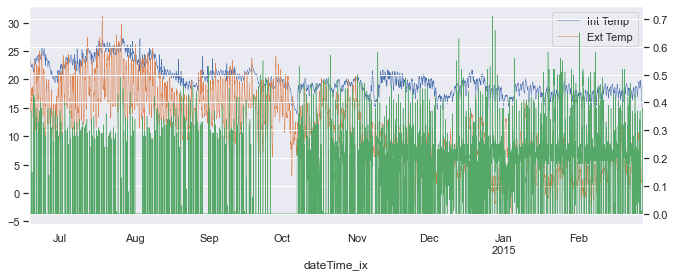

In [4]:
# Using extract_data, create a dataframe for each of: Int Temp, Ext Temp, Gas. The TimeSeriesVariables are:
# Int Temp: TimeSeriesVariable15
# Ext Temp: TimeSeriesVariable1573
# Gas:      TimeSeriesVariable1554


## use pd.merge to merge the dfs on the datetime index

print(df_merge.head())

# Plot the 3 feature time series
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

ax1 = df_merge[['Int Temp', 'Ext Temp']].plot(linewidth=0.5);
ax2 = df_merge['Gas'].plot(linewidth=0.5, secondary_y=True);

## Working with sktime

To practice with the REFIT dataset, we will look at a single month's worth of external temperature data, and try to forecast two weeks out.


## Task 2

-> Extract just the 'Ext Temp' time series.

-> Slice just the time period from 2014-06-30 to 2014-08-14

-> resample to 1 hour (using the mean of the hour)

-> plot the time series using sktime's function

DatetimeIndex(['2014-06-30 00:00:00+00:00', '2014-06-30 01:00:00+00:00',
               '2014-06-30 02:00:00+00:00', '2014-06-30 03:00:00+00:00',
               '2014-06-30 04:00:00+00:00', '2014-06-30 05:00:00+00:00',
               '2014-06-30 06:00:00+00:00', '2014-06-30 07:00:00+00:00',
               '2014-06-30 08:00:00+00:00', '2014-06-30 09:00:00+00:00',
               ...
               '2014-08-14 14:00:00+00:00', '2014-08-14 15:00:00+00:00',
               '2014-08-14 16:00:00+00:00', '2014-08-14 17:00:00+00:00',
               '2014-08-14 18:00:00+00:00', '2014-08-14 19:00:00+00:00',
               '2014-08-14 20:00:00+00:00', '2014-08-14 21:00:00+00:00',
               '2014-08-14 22:00:00+00:00', '2014-08-14 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='dateTime_ix', length=1104, freq='H')


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Ext Temp'>)

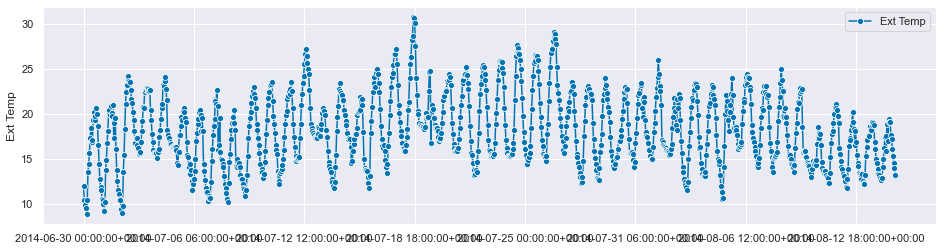

In [6]:
# Use the plotting function from sktime
from sktime.utils.plotting import plot_series

feature = "Ext Temp"

# select just the feature of interest from the dataframe. Use df.squueze to convert the slice to a Series 
# We'll look at just March 2014 and predict two weeks forward

# Resmaple to '1H' using df.resample

# plot the series


## Specifying the forecasting task
Using the March data as training data, let's try to predict the first two weeks of April

## Task 3

-> use sktime's temporal_train_test_split to create training and test splits

-> plot the time series, including both the training and test split.

768 336


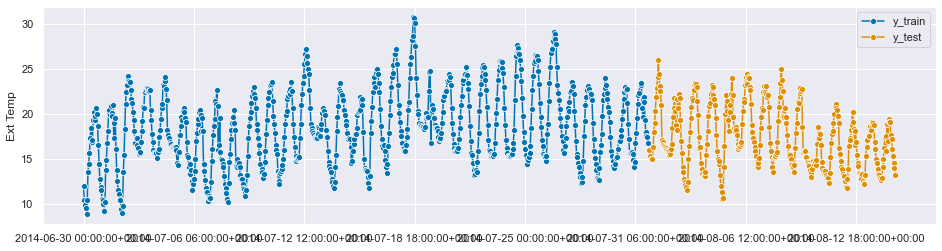

In [7]:
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split
)
from sktime.forecasting.base import ForecastingHorizon

test_size = 2 * 7 * 24 # our test size is 2 weeks (2 * 7days * 24hours)


### Forecasting Horizon
Create a `ForecastingHorizon` from the two weeks we kept out as test data.

In [8]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2014-08-01 00:00:00+00:00', '2014-08-01 01:00:00+00:00',
               '2014-08-01 02:00:00+00:00', '2014-08-01 03:00:00+00:00',
               '2014-08-01 04:00:00+00:00', '2014-08-01 05:00:00+00:00',
               '2014-08-01 06:00:00+00:00', '2014-08-01 07:00:00+00:00',
               '2014-08-01 08:00:00+00:00', '2014-08-01 09:00:00+00:00',
               ...
               '2014-08-14 14:00:00+00:00', '2014-08-14 15:00:00+00:00',
               '2014-08-14 16:00:00+00:00', '2014-08-14 17:00:00+00:00',
               '2014-08-14 18:00:00+00:00', '2014-08-14 19:00:00+00:00',
               '2014-08-14 20:00:00+00:00', '2014-08-14 21:00:00+00:00',
               '2014-08-14 22:00:00+00:00', '2014-08-14 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='dateTime_ix', length=336, freq='H', is_relative=False)

## Naive Baselines

We'll set up some basline performance scores.

### Task 4

-> Create a naive baseline using the last value of the same season.

-> Plot the predictions and calculate the smape loss


### Predicting the last value of the same season

It looks to me like we have a daily seasonality. 

0.11758353662855943

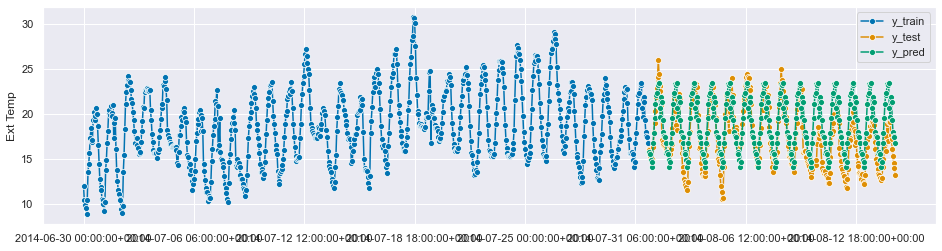

In [10]:
# Predicting the same value of the same season using NaiveForecaster

## Forecasting

### Task 5

-> Predict using one of: Exponential Smoothing, AutoETS, ARIMA, or AutoARIMA

In [1]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.compose import (
    EnsembleForecaster,
    ReducedRegressionForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.arima import ARIMA, AutoARIMA

x

### Detrending
Within this month-long period, it looks like we don't have a strictly linear trend, but more like a parabolic (i.e. 2 deg polynomial) trend. In reality, this is literal seasonality (temperature changes with the seasons throughout the year) but within this window, it merely appears as a trend.

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Ext Temp'>)

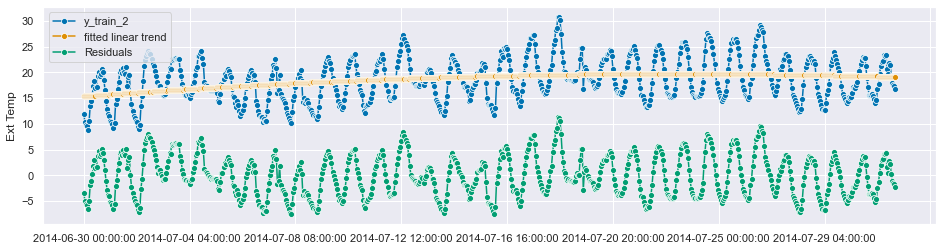

In [11]:
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
# linear detrending
y_train_2 = y_train.copy()
y_train_2 = y_train_2.tz_convert(None)

forecaster = PolynomialTrendForecaster(degree=2)
transformer = Detrender(forecaster=forecaster)
yt = transformer.fit_transform(y_train_2)

fh_ins = -np.arange(len(y_train_2))
y_pred = forecaster.fit(y_train_2).predict(fh=fh_ins)

plot_series(y_train_2, y_pred, yt, labels=['y_train_2', 'fitted linear trend', 'Residuals'])

### Pipelining